In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mumbai House Prices.csv')
df

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown


In [3]:
df.dtypes

bhk             int64
type           object
locality       object
area            int64
price         float64
price_unit     object
region         object
status         object
age            object
dtype: object

In [4]:
df.isnull().sum()/df.shape[0]*100

bhk           0.0
type          0.0
locality      0.0
area          0.0
price         0.0
price_unit    0.0
region        0.0
status        0.0
age           0.0
dtype: float64

<Axes: >

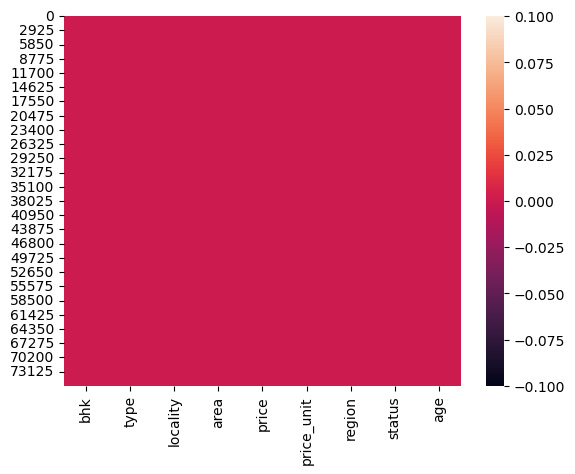

In [5]:
sb.heatmap(df.isnull())

In [6]:
df_obj=df.select_dtypes(object)
df_obj

,type,locality,price_unit,region,status,age
0,Apartment,Lak And Hanware The Residency Tower,Cr,Andheri West,Ready to move,New
1,Apartment,Radheya Sai Enclave Building No 2,L,Naigaon East,Under Construction,New
2,Apartment,Romell Serene,Cr,Borivali West,Under Construction,New
3,Apartment,Soundlines Codename Urban Rainforest,L,Panvel,Under Construction,New
4,Apartment,Origin Oriana,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...
76033,Apartment,Parinee Liva Roca,Cr,Juhu,Ready to move,Unknown
76034,Apartment,Parinee Liva Roca,Cr,Juhu,Ready to move,Unknown
76035,Apartment,Lodha Seaview,Cr,Napeansea Road,Ready to move,Unknown
76036,Apartment,Hubtown Serene,Cr,Bandra East,Ready to move,Unknown


In [7]:
df_num=df.select_dtypes(['float64','int64'])
df_num

,bhk,area,price
0,3,685,2.50
1,2,640,52.51
2,2,610,1.73
3,2,876,59.98
4,2,659,94.11
...,...,...,...
76033,3,1527,7.00
76034,5,3049,12.00
76035,4,3313,10.00
76036,2,1305,4.25


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_obj.columns
for i in df_obj:
    df_obj[i]=le.fit_transform(df_obj[i])

In [9]:
df_obj

,type,locality,price_unit,region,status,age
0,0,3019,0,8,0,0
1,0,4965,1,124,1,0
2,0,7031,0,31,1,0
3,0,8484,1,140,1,0
4,0,4288,1,117,1,0
...,...,...,...,...,...,...
76033,0,4444,0,69,0,2
76034,0,4444,0,69,0,2
76035,0,3264,0,128,0,2
76036,0,2301,0,18,0,2


In [10]:
df_sum=pd.concat([df_obj,df_num],axis=1)
df_sum

,type,locality,price_unit,region,status,age,bhk,area,price
0,0,3019,0,8,0,0,3,685,2.50
1,0,4965,1,124,1,0,2,640,52.51
2,0,7031,0,31,1,0,2,610,1.73
3,0,8484,1,140,1,0,2,876,59.98
4,0,4288,1,117,1,0,2,659,94.11
...,...,...,...,...,...,...,...,...,...
76033,0,4444,0,69,0,2,3,1527,7.00
76034,0,4444,0,69,0,2,5,3049,12.00
76035,0,3264,0,128,0,2,4,3313,10.00
76036,0,2301,0,18,0,2,2,1305,4.25


In [11]:
X=df_sum.drop('price',axis=1)
Y=df_sum['price']

In [12]:
X.shape

(76038, 8)

In [13]:
Y.shape

(76038,)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
X_train.shape

(53226, 8)

In [16]:
X_test.shape

(22812, 8)

In [17]:
Y_train.shape

(53226,)

In [18]:
Y_test.shape

(22812,)

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [20]:
X_train

array([[-1.23192665e-01,  1.58685433e+00,  1.08134280e+00, ...,
        -8.98505066e-01, -1.10050199e+00, -9.69247502e-01],
       [-1.23192665e-01,  1.00001330e-01,  1.08134280e+00, ...,
        -8.98505066e-01, -1.75587128e-02, -3.90475870e-02],
       [-1.23192665e-01,  1.35092394e+00, -9.24776121e-01, ...,
        -8.98505066e-01, -1.75587128e-02,  8.16995175e-02],
       ...,
       [-1.23192665e-01,  1.70569796e-01, -9.24776121e-01, ...,
        -8.98505066e-01,  1.06538456e+00,  2.21825787e-01],
       [-1.23192665e-01, -9.97671136e-02,  1.08134280e+00, ...,
        -8.98505066e-01, -1.75587128e-02, -2.89257152e-04],
       [-1.23192665e-01, -1.61189837e+00,  1.08134280e+00, ...,
        -8.98505066e-01, -1.10050199e+00, -7.53095279e-01]])

In [21]:
X_test

array([[-0.12319266, -0.59655507,  1.0813428 , ..., -0.89850507,
        -1.10050199, -0.522036  ],
       [-0.12319266,  1.06197942,  1.0813428 , ...,  0.39658608,
        -1.10050199, -0.44004723],
       [-0.12319266, -1.59574837, -0.92477612, ...,  0.39658608,
        -0.01755871,  0.03697837],
       ...,
       [-0.12319266,  0.80041969,  1.0813428 , ...,  0.39658608,
        -1.10050199, -0.55781292],
       [-0.12319266, -0.03902908, -0.92477612, ..., -0.89850507,
        -0.01755871, -0.60402478],
       [-0.12319266,  1.21154244,  1.0813428 , ...,  1.69167722,
        -1.10050199, -0.66365298]])

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [23]:
lr.coef_

array([-2.38019795, -0.21918097, 32.09594813,  0.47125378,  0.1251057 ,
       -1.49880163,  4.72628846,  0.82132618])

In [24]:
lr.intercept_

29.422777965655882

In [25]:
ypred=lr.predict(X_test)
ypred

array([61.0187296 , 57.93932496, -0.77709422, ..., 57.10921071,
        1.53018726, 55.12166397])

In [26]:
dict={"actual op":Y_test,'predict op':ypred}
df1=pd.DataFrame(dict)
df1

,actual op,predict op
11964,37.00,61.018730
49752,62.00,57.939325
41254,1.80,-0.777094
10895,26.00,59.069806
68865,2.25,1.920193
...,...,...
9940,1.43,-0.140209
17403,70.00,57.901013
741,20.00,57.109211
40217,1.09,1.530187


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
print("mean square error",mean_squared_error(Y_test,ypred))

mean square error 221.23472401340763


In [29]:
a=mean_squared_error(Y_test,ypred)
rmse=np.sqrt(a)
print("root mean square error",rmse)

root mean square error 14.87396127510784


In [30]:
from sklearn.metrics import r2_score
print("r2_score ",r2_score(Y_test,ypred))

r2_score  0.7950632414881491


In [31]:
lr.score(X_train,Y_train)

0.7984975608194557

In [32]:
lr.score(X_test,Y_test)

0.7950632414881491

In [33]:
residual_error=Y_test-ypred
print("residual error",residual_error)

residual error 11964   -24.018730
49752     4.060675
41254     2.577094
10895   -33.069806
68865     0.329807
           ...    
9940      1.570209
17403    12.098987
741     -37.109211
40217    -0.440187
60080   -26.131664
Name: price, Length: 22812, dtype: float64


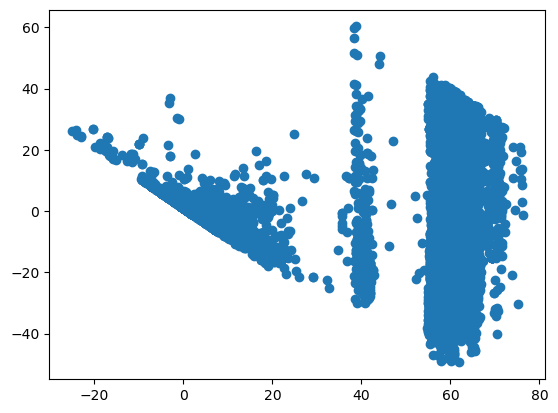

In [34]:
import matplotlib.pyplot as plt
plt.scatter(ypred,residual_error)

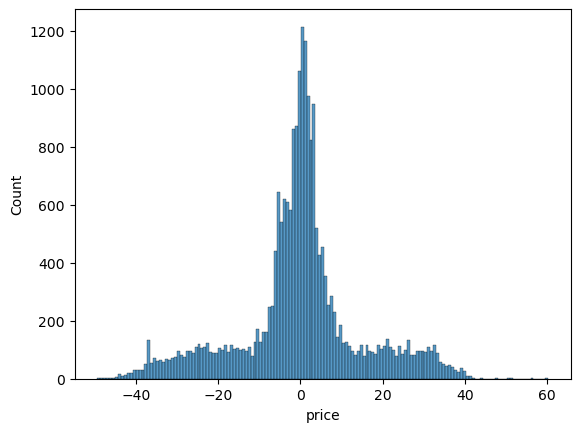

In [35]:
sb.histplot(residual_error)
plt.show()

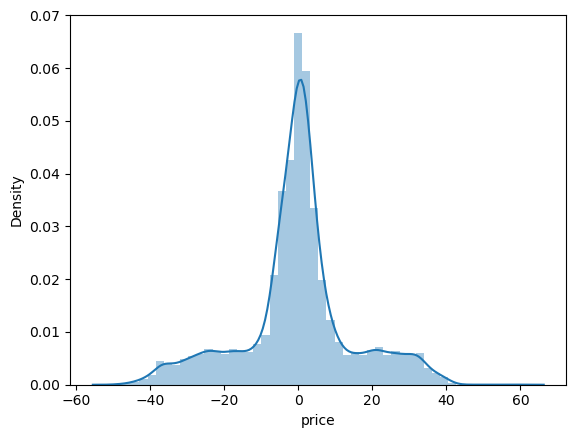

In [36]:
sb.distplot(residual_error,hist=True)
plt.show()

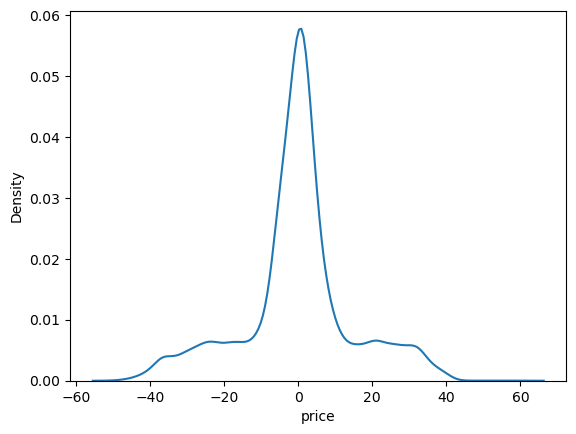

In [37]:
sb.distplot(residual_error,hist=False)
plt.show()

In [38]:
print(residual_error.skew())

-0.09715485485493289


<Axes: >

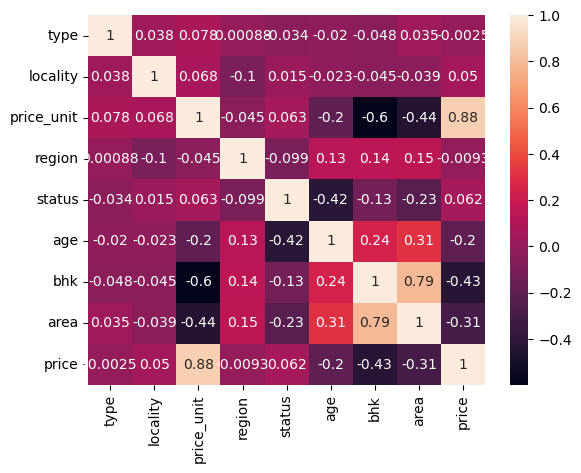

In [39]:
sb.heatmap(df_sum.corr(),annot=True)

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
X=df_sum.drop('price',axis=1)
Y=df_sum['price']


In [42]:
pf=PolynomialFeatures(2)


In [43]:
X_poly=pf.fit_transform(X)


In [44]:
X_poly

array([[1.0000000e+00, 0.0000000e+00, 3.0190000e+03, ..., 9.0000000e+00,
        2.0550000e+03, 4.6922500e+05],
       [1.0000000e+00, 0.0000000e+00, 4.9650000e+03, ..., 4.0000000e+00,
        1.2800000e+03, 4.0960000e+05],
       [1.0000000e+00, 0.0000000e+00, 7.0310000e+03, ..., 4.0000000e+00,
        1.2200000e+03, 3.7210000e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 3.2640000e+03, ..., 1.6000000e+01,
        1.3252000e+04, 1.0975969e+07],
       [1.0000000e+00, 0.0000000e+00, 2.3010000e+03, ..., 4.0000000e+00,
        2.6100000e+03, 1.7030250e+06],
       [1.0000000e+00, 0.0000000e+00, 8.6920000e+03, ..., 2.5000000e+01,
        2.6000000e+04, 2.7040000e+07]])

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [46]:
X_train.shape

(53226, 45)

In [47]:
X_test.shape

(22812, 45)

In [48]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)

In [49]:
X_test=ss.transform(X_test)

In [50]:
lr.fit(X_train,Y_train)

LinearRegression()

In [51]:
print("coefficent slope",lr.coef_)


coefficent slope [ 8.01655753e-17 -4.48407705e-01 -7.57497339e-01  7.72444730e+00
  7.48527643e+00  9.05105167e-01  3.18319771e+00  1.16859065e+00
  1.38367877e+00  2.06967717e+00 -1.06222572e-01 -2.31463664e+00
 -1.23089512e+00 -4.23771593e-01  1.09584487e+00 -9.75224184e-01
  5.39350083e-03 -1.82909174e-01 -3.40334042e-01  1.40304246e-01
  5.40384835e-02  3.65541756e-01  6.17337721e-01 -1.18309523e-01
  7.72444730e+00  3.31439990e+00  8.03802476e-01 -1.83615470e+00
  7.02200913e+00  7.38675147e+00 -1.04436507e+01  2.25672772e-01
  1.53969199e+00  2.64568948e+00 -1.20849664e+00  9.05105167e-01
 -5.23769969e-01 -2.27624780e-01 -9.09161523e-01 -2.62959692e+00
 -4.62171874e-01 -1.54051695e+00 -2.87899104e+00  2.66969504e+00
  2.71551347e-01]


In [52]:
print("intercept value:--",lr.intercept_)

intercept value:-- 29.422777965655865


In [53]:
ypred=lr.predict(X_test)
ypred

array([59.76752056, 57.64097297,  4.18937396, ..., 45.43039652,
       -0.84137967, 41.95238517])

In [54]:
dict={"Actual Output":Y_test,"Predict output":ypred} #predict best fit line
df2=pd.DataFrame(dict)
df2

,Actual Output,Predict output
11964,37.00,59.767521
49752,62.00,57.640973
41254,1.80,4.189374
10895,26.00,47.209071
68865,2.25,-3.627245
...,...,...
9940,1.43,0.589283
17403,70.00,56.972047
741,20.00,45.430397
40217,1.09,-0.841380


In [55]:
print("mean sqaured error",mean_squared_error(Y_test,ypred)) 

mean sqaured error 180.40765551542074


In [56]:
mse=mean_squared_error(Y_test,ypred)
print(mse)
#check for root of mean square  :--- error minmize error
rmse=np.sqrt(mse)
print("Root Mean Squared Error",rmse)

180.40765551542074
Root Mean Squared Error 13.431591697018664


In [57]:
from sklearn.metrics import r2_score
print('r2_score',r2_score(Y_test,ypred))

r2_score 0.8328826530422397


In [58]:
residual_error=Y_test-ypred
print('Residual error for each data points ',residual_error)

Residual error for each data points  11964   -22.767521
49752     4.359027
41254    -2.389374
10895   -21.209071
68865     5.877245
           ...    
9940      0.840717
17403    13.027953
741     -25.430397
40217     1.931380
60080   -12.962385
Name: price, Length: 22812, dtype: float64


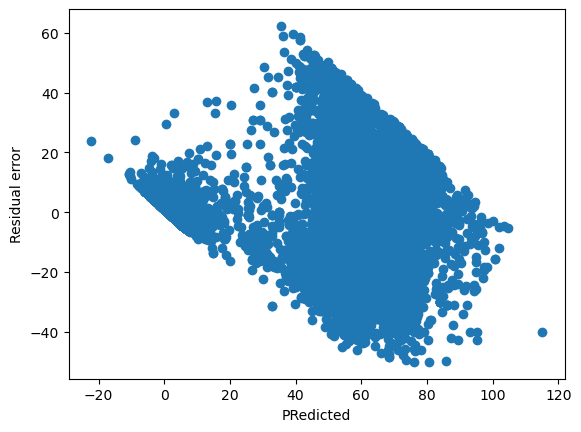

In [59]:
import matplotlib.pyplot as plt
plt.scatter(ypred,residual_error)
# sb.scatterplot(y_pred,residual_error)
# plt.plot(y_pred,residual_error,color='red')
plt.xlabel('PRedicted')
plt.ylabel('Residual error')
plt.show()

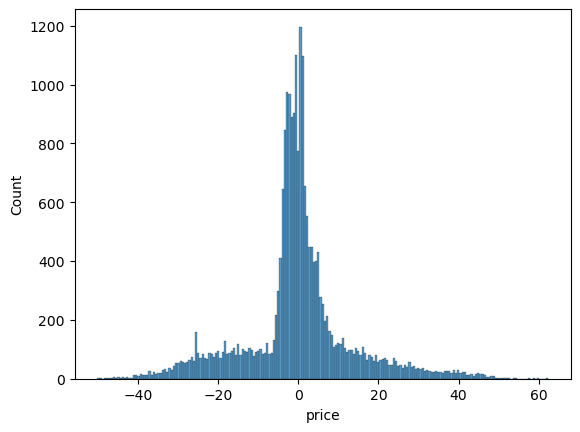

In [60]:
sb.histplot(residual_error)
plt.show()

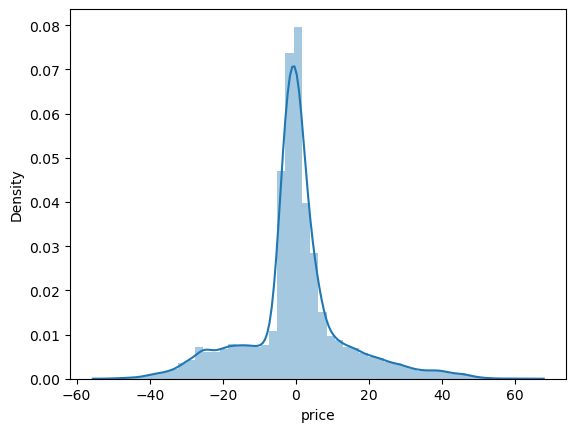

In [61]:
sb.distplot(residual_error,hist=True)
plt.show()

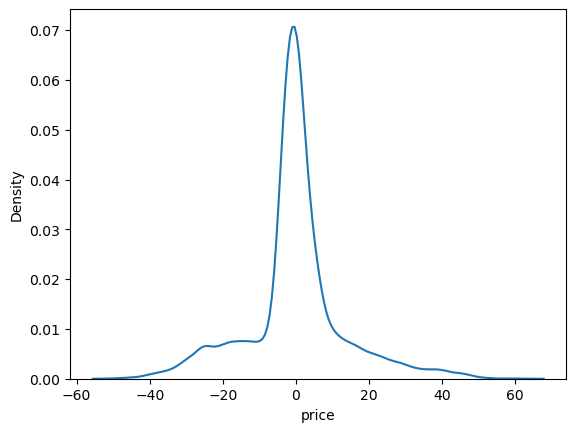

In [62]:
sb.distplot(residual_error,hist=False)
plt.show()

In [63]:
print(residual_error.skew())

0.26425580189392306


In [64]:
lr.score(X_train,Y_train)

0.8356517011093924

In [65]:
lr.score(X_test,Y_test)

0.8328826530422397